In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/nhann/Downloads/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# K-Means Clustering Visualization

Silhouette score for k=2: 0.6626809632068308


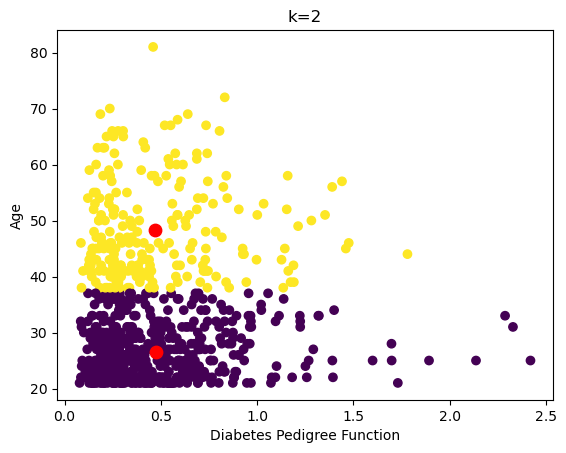

Silhouette score for k=3: 0.6476126010968893


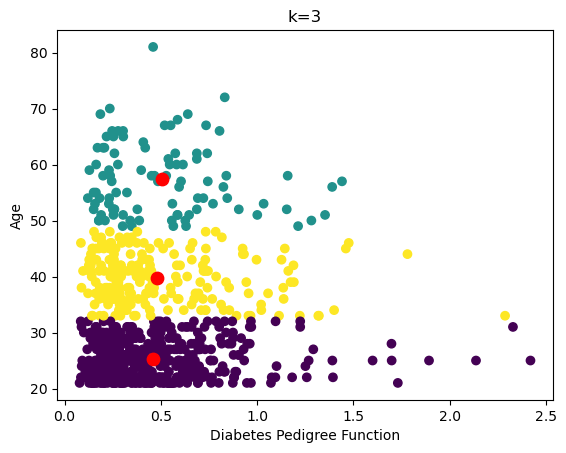

Silhouette score for k=5: 0.5714354871651124


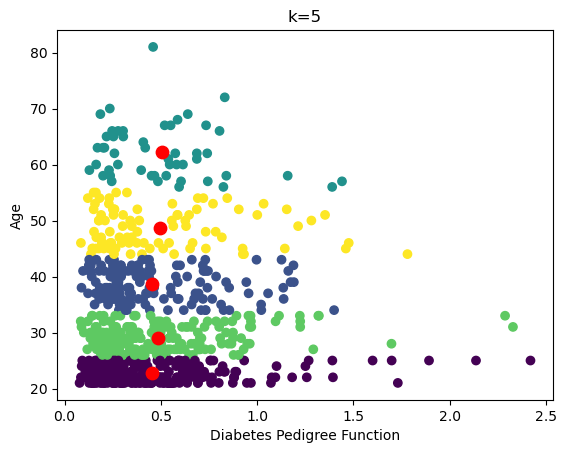

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = data.iloc[:,[6,7]].values
X

# define range of number of clusters to try
k_range = [2, 3, 5]

# initialize an empty list to store silhouette scores for each k
silhouette_scores = []

# iterate over each k
for k in k_range:
    # fit kMeans model
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    
    # evaluate quality of clustering using silhouette score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score}")
    
    # plot the clusters and centroids for visualization
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c='r', label = 'Centroids')
    plt.title(f"k={k}")
    plt.ylabel('Age')
    plt.xlabel('Diabetes Pedigree Function')
    plt.show()

# Average Silhouette Score Comparison

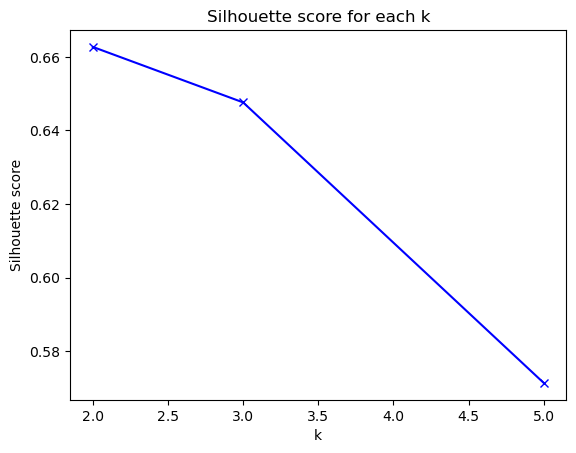

In [4]:
# plot the silhouette scores for each k to find the optimal k
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for each k')
plt.show()

# Finding Optimal K with the Elbow Method

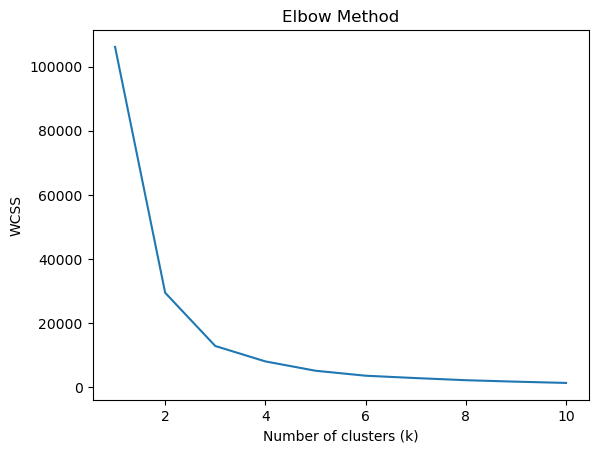

In [5]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# use elbow method to find the optimal k
# calculate the within-cluster sum of squares (wcss) for each k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    wcss.append(kmeans.inertia_)

# plot the wcss for each k to visualize the elbow
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [37]:
# find the optimal k using elbow method
# the optimal k is at the point of maximum curvature (elbow) in the plot
diffs = np.diff(wcss)
elbow_index = np.argmin(diffs[1:]) + 1
optimal_k = elbow_index + 1
print(f"The optimal k according to the elbow method is {optimal_k}.")

The optimal k according to the elbow method is 2.
